<a href="https://colab.research.google.com/github/Fatemah-Husain/Extracting-Lexicons-from-the-Quran/blob/main/Blog_Extracting_Lexicons_from_the_Quran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting Lexicons from the Quran**

By Fatemah Husain (f.husain@ku.edu.kw) - Full blog post is available at [the Information Science Lab](https://infoscilab.ku.edu.kw/) - All resources used are available at this [GitHub repository](https://github.com/Fatemah-Husain).

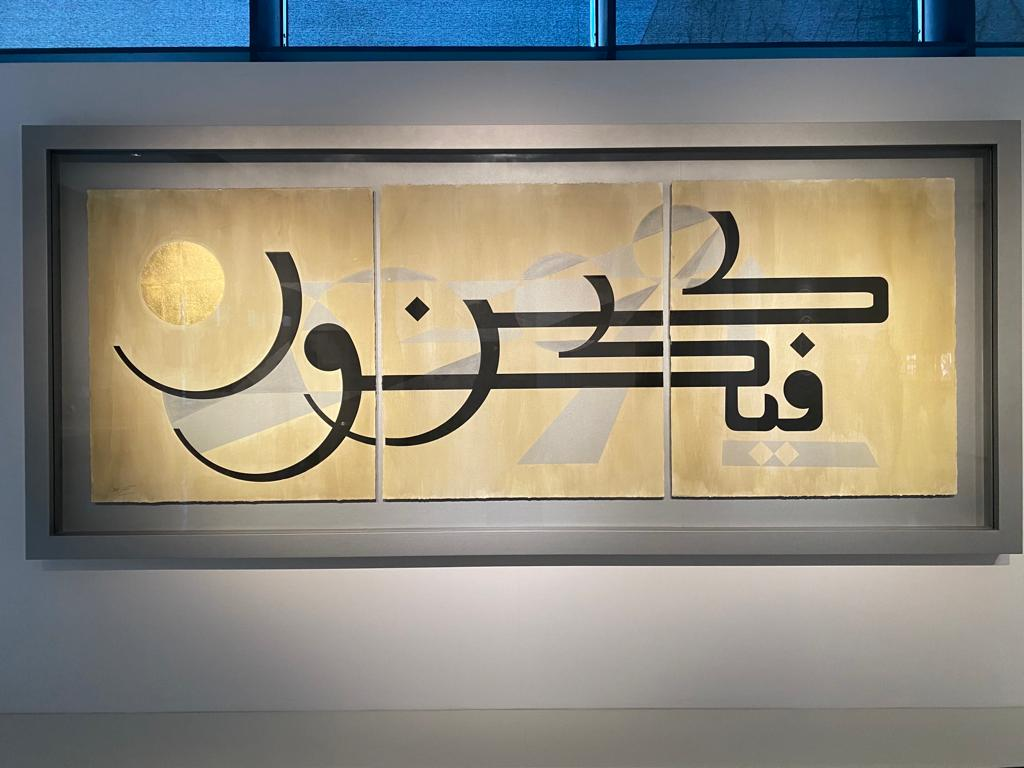


Extracting lexicons from raw text automatically enables the creation of valuable linguistic resources that can serve multiple tasks. Depending on the method applied in extracting the lexicons, lexicons provide insights into the context of the text, they can be used in developing systems and applications as a source of contextual knowledge (e.g. question answering systems, text classification, translation...etc.), they can be used to find collocations, and they can help in creating taxonomies.


We will explore five lexicon extraction statistical methods in this article as the following:

1.   Simple frequency count.
2.   Pointwise Mutual Information (PMI).
3. T-test.
4. Chi-square test.
5. Likelihood ratio.


Some parts from this article are depending on the content from the following paper:


> Husain, F. & Uzuner, O. (2021). SalamREPO: an Arabic Offensive Language Knowledge Repository. Future Technologies and Innovations (FTI) Proceedings: 4th International Conference on Computer Applications & Information Security (ICCAIS’2021). March 19-21, Tunisia. [https://fti-tn.net/iccais-2021-list-of-papers ](https://fti-tn.net/iccais-2021-list-of-papers )









#Importing Dataset and Python Libraries

We downloaded the full text of the holly Quran from [Tanzil website](https://tanzil.net/download/). We select the format of the text to be simple clean without Tatweel and without signs of pause or sajda or rub-el-hizb to make it simpler for analysis. In addition, we choose the file format to be text (.txt).

Once you are done downloading the file to your device, you can upload it to the Colab project directory by selecting the icon on the left with an upward arrow to upload it to session storage. Then, choose the Quran text file you have on your device. The name of the file we are using is Quran-simple-clean.txt.

We start coding as usual by importing python libraries:

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import string
import os


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


To read the quran text file and print its content on the screen, use the following script:

In [ ]:
# reading the txt file
a_file = open("/content/quran-simple-clean.txt")

# print file content
lines = a_file.readlines()
for line in lines:
    print(line)

Streaming output truncated to the last 5000 lines.
ولقد أضل منكم جبلا كثيرا أفلم تكونوا تعقلون

هذه جهنم التي كنتم توعدون

اصلوها اليوم بما كنتم تكفرون

اليوم نختم على أفواههم وتكلمنا أيديهم وتشهد أرجلهم بما كانوا يكسبون

ولو نشاء لطمسنا على أعينهم فاستبقوا الصراط فأنى يبصرون

ولو نشاء لمسخناهم على مكانتهم فما استطاعوا مضيا ولا يرجعون

ومن نعمره ننكسه في الخلق أفلا يعقلون

وما علمناه الشعر وما ينبغي له إن هو إلا ذكر وقرآن مبين

لينذر من كان حيا ويحق القول على الكافرين

أولم يروا أنا خلقنا لهم مما عملت أيدينا أنعاما فهم لها مالكون

وذللناها لهم فمنها ركوبهم ومنها يأكلون

ولهم فيها منافع ومشارب أفلا يشكرون

واتخذوا من دون الله آلهة لعلهم ينصرون

لا يستطيعون نصرهم وهم لهم جند محضرون

فلا يحزنك قولهم إنا نعلم ما يسرون وما يعلنون

أولم ير الإنسان أنا خلقناه من نطفة فإذا هو خصيم مبين

وضرب لنا مثلا ونسي خلقه قال من يحيي العظام وهي رميم

قل يحييها الذي أنشأها أول مرة وهو بكل خلق عليم

الذي جعل لكم من الشجر الأخضر نارا فإذا أنتم منه توقدون

أوليس الذي خلق السماوات والأرض بقادر على أن يخلق مثله

If you scroll down the output screen, you will notice that the file contains some English comment at the end that does not belong to the Quran content. It has some term-of-use conditions and version information, which are not relevant to our analysis. Thus, we will delete these lines using the following script:


In [ ]:
# delete last lines in the txt file that contains comments
# then save the quran text in another file called quran.txt

#with open("sample.txt", "r") as input:
with open("temp.txt", "w") as output:
    # iterate all lines from file
    for line in lines:
        # if line starts with symbol '#' then don't write it in temp file
        if not line.strip("\n").startswith('#'):
            output.write(line)

# replace temp file with quran.txt name file
os.replace('temp.txt', 'quran.txt')

Now, let's print the content of the new quran.txt file to check if the comments are not there and to make sure that it only has quranic text.

In [ ]:
b_file = open("/content/quran.txt")


b_lines = b_file.readlines()
for line in b_lines:
    print(line)

Streaming output truncated to the last 5000 lines.
وجعلنا فيها جنات من نخيل وأعناب وفجرنا فيها من العيون

ليأكلوا من ثمره وما عملته أيديهم أفلا يشكرون

سبحان الذي خلق الأزواج كلها مما تنبت الأرض ومن أنفسهم ومما لا يعلمون

وآية لهم الليل نسلخ منه النهار فإذا هم مظلمون

والشمس تجري لمستقر لها ذلك تقدير العزيز العليم

والقمر قدرناه منازل حتى عاد كالعرجون القديم

لا الشمس ينبغي لها أن تدرك القمر ولا الليل سابق النهار وكل في فلك يسبحون

وآية لهم أنا حملنا ذريتهم في الفلك المشحون

وخلقنا لهم من مثله ما يركبون

وإن نشأ نغرقهم فلا صريخ لهم ولا هم ينقذون

إلا رحمة منا ومتاعا إلى حين

وإذا قيل لهم اتقوا ما بين أيديكم وما خلفكم لعلكم ترحمون

وما تأتيهم من آية من آيات ربهم إلا كانوا عنها معرضين

وإذا قيل لهم أنفقوا مما رزقكم الله قال الذين كفروا للذين آمنوا أنطعم من لو يشاء الله أطعمه إن أنتم إلا في ضلال مبين

ويقولون متى هذا الوعد إن كنتم صادقين

ما ينظرون إلا صيحة واحدة تأخذهم وهم يخصمون

فلا يستطيعون توصية ولا إلى أهلهم يرجعون

ونفخ في الصور فإذا هم من الأجداث إلى ربهم ينسلون

قالوا يا ويلنا من

You can scroll down the output screen and check that it ends with the chapter/Sura "Surat Al Naas". Thus, all text in the file is from the Quran text.


I prefer to convert the txt file to a dataframe and then start analysis as that can help to add columns for each preprocessing step performed on the text, which can support comparison among the different versions of the text used based on the analysis procedures performed.

In [ ]:
# convert txt file to dataframe
data = pd.read_csv('quran.txt', sep=',', header = None)
data

,0
0,بسم الله الرحمن الرحيم
1,الحمد لله رب العالمين
2,الرحمن الرحيم
3,مالك يوم الدين
4,إياك نعبد وإياك نستعين
...,...
6231,ملك الناس
6232,إله الناس
6233,من شر الوسواس الخناس
6234,الذي يوسوس في صدور الناس


In [ ]:
# selecting the input array from the dataframe to process
raw_data = data.iloc[:,0]
raw_data

0         بسم الله الرحمن الرحيم
1          الحمد لله رب العالمين
2                  الرحمن الرحيم
3                 مالك يوم الدين
4         إياك نعبد وإياك نستعين
                  ...           
6231                   ملك الناس
6232                   إله الناس
6233        من شر الوسواس الخناس
6234    الذي يوسوس في صدور الناس
6235             من الجنة والناس
Name: 0, Length: 6236, dtype: object

In [ ]:
# import library
import nltk
nltk.download('punkt')

# tokenize text and saving the output to a new column "tokens"
data['tokens'] = raw_data.apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# print the entire dataframe including the tokenized text
data

,0,tokens
0,بسم الله الرحمن الرحيم,"[بسم, الله, الرحمن, الرحيم]"
1,الحمد لله رب العالمين,"[الحمد, لله, رب, العالمين]"
2,الرحمن الرحيم,"[الرحمن, الرحيم]"
3,مالك يوم الدين,"[مالك, يوم, الدين]"
4,إياك نعبد وإياك نستعين,"[إياك, نعبد, وإياك, نستعين]"
...,...,...
6231,ملك الناس,"[ملك, الناس]"
6232,إله الناس,"[إله, الناس]"
6233,من شر الوسواس الخناس,"[من, شر, الوسواس, الخناس]"
6234,الذي يوسوس في صدور الناس,"[الذي, يوسوس, في, صدور, الناس]"


In [ ]:
#turn all tokens into one single list

list_tokens = [item for items in data['tokens'] for item in items]


In [ ]:
# check tokens list
list_tokens

['بسم',
 'الله',
 'الرحمن',
 'الرحيم',
 'الحمد',
 'لله',
 'رب',
 'العالمين',
 'الرحمن',
 'الرحيم',
 'مالك',
 'يوم',
 'الدين',
 'إياك',
 'نعبد',
 'وإياك',
 'نستعين',
 'اهدنا',
 'الصراط',
 'المستقيم',
 'صراط',
 'الذين',
 'أنعمت',
 'عليهم',
 'غير',
 'المغضوب',
 'عليهم',
 'ولا',
 'الضالين',
 'بسم',
 'الله',
 'الرحمن',
 'الرحيم',
 'الم',
 'ذلك',
 'الكتاب',
 'لا',
 'ريب',
 'فيه',
 'هدى',
 'للمتقين',
 'الذين',
 'يؤمنون',
 'بالغيب',
 'ويقيمون',
 'الصلاة',
 'ومما',
 'رزقناهم',
 'ينفقون',
 'والذين',
 'يؤمنون',
 'بما',
 'أنزل',
 'إليك',
 'وما',
 'أنزل',
 'من',
 'قبلك',
 'وبالآخرة',
 'هم',
 'يوقنون',
 'أولئك',
 'على',
 'هدى',
 'من',
 'ربهم',
 'وأولئك',
 'هم',
 'المفلحون',
 'إن',
 'الذين',
 'كفروا',
 'سواء',
 'عليهم',
 'أأنذرتهم',
 'أم',
 'لم',
 'تنذرهم',
 'لا',
 'يؤمنون',
 'ختم',
 'الله',
 'على',
 'قلوبهم',
 'وعلى',
 'سمعهم',
 'وعلى',
 'أبصارهم',
 'غشاوة',
 'ولهم',
 'عذاب',
 'عظيم',
 'ومن',
 'الناس',
 'من',
 'يقول',
 'آمنا',
 'بالله',
 'وباليوم',
 'الآخر',
 'وما',
 'هم',
 'بمؤمنين',
 'يخادعون',
 '

#**Lexicons Extraction Methods:**

# **1. Simple Frequency Count of Adjacent Words¶**

This method is very simple. It depends on the word order by their frequencies in text. The main issues that usually occur in its output is that it is too sensitive to very frequent pairs, which might represent pronouns, articles,and prepositions that are not valuable to the context of the text.





In all examples below, we will apply the lexicon extraction methods for two length: bigrams for two words lexicons and trigrams for three words lexicons. Initialize NLTK's library function for Bigrams and Trigrams Finder as the following:


In [ ]:
# intialize bigrams and trigrams measures and extract them from the text
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(list_tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(list_tokens)

In [ ]:
# create frequency table
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

# print table head
bigramFreqTable.head().reset_index(drop=True)

,bigram,freq
0,"(إن, الله)",205
1,"(الذين, آمنوا)",184
2,"(في, الأرض)",176
3,"(يا, أيها)",142
4,"(الذين, كفروا)",134


In [ ]:
# print most frequent top 15 bigrams
bigramFreqTable[:15]

,bigram,freq
245,"(إن, الله)",205
153,"(الذين, آمنوا)",184
125,"(في, الأرض)",176
250,"(يا, أيها)",142
66,"(الذين, كفروا)",134
499,"(السماوات, والأرض)",133
2,"(الرحمن, الرحيم)",118
0,"(بسم, الله)",115
1,"(الله, الرحمن)",114
338,"(من, قبل)",92


You might notice that most of the top frequent frequency bigrams include particles and pronouns, which are called stop words in Natural Language Processing (NLP). For more detail about the meaning of stop words, [please refer to our previous blog](https://infoscilab.ku.edu.kw/tools-and-techniques-for-exploratory-data-analysis/).  

The following method remove stop words from the text.  

In [ ]:
#function to remove stop words
def rightTypes(ngram):
    #if stop word:
        #return False
    ar_stopwords = set(stopwords.words('arabic'))
    for word in ngram:
        if (word in ar_stopwords):
            return False
    sentence = ngram
    return True
  

Applying the filtering method to the frequency based bigrams and printing the top 50 filtered bigrams.


In [ ]:
#filter bigrams
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]

# print top 50 filtered bigrams
filtered_bi[:50]

,bigram,freq
499,"(السماوات, والأرض)",133
2,"(الرحمن, الرحيم)",118
0,"(بسم, الله)",115
1,"(الله, الرحمن)",114
2352,"(سبيل, الله)",69
1283,"(الحياة, الدنيا)",61
1750,"(يوم, القيامة)",60
319,"(وعملوا, الصالحات)",53
318,"(آمنوا, وعملوا)",50
4685,"(الله, ورسوله)",44


In [ ]:
# extracting trigrams and save the results into a table 
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

# checking the head of the table
trigramFreqTable.head().reset_index(drop=True)

,trigram,freq
0,"(بسم, الله, الرحمن)",114
1,"(الله, الرحمن, الرحيم)",114
2,"(يا, أيها, الذين)",92
3,"(أيها, الذين, آمنوا)",89
4,"(من, دون, الله)",71


In [ ]:
# printing the top 50 frequency based trigrams
trigramFreqTable[:50]

,trigram,freq
0,"(بسم, الله, الرحمن)",114
1,"(الله, الرحمن, الرحيم)",114
1724,"(يا, أيها, الذين)",92
1725,"(أيها, الذين, آمنوا)",89
308,"(من, دون, الله)",71
255,"(على, كل, شيء)",52
329,"(آمنوا, وعملوا, الصالحات)",50
4608,"(إن, في, ذلك)",50
2594,"(في, سبيل, الله)",44
1961,"(ما, في, السماوات)",39


In [ ]:
# filtering the content
filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypes(x))]

#print the top 50 filtered frequency based trigrams
filtered_tri[:50]

,trigram,freq
0,"(بسم, الله, الرحمن)",114
1,"(الله, الرحمن, الرحيم)",114
329,"(آمنوا, وعملوا, الصالحات)",50
57841,"(فبأي, آلاء, ربكما)",31
57842,"(آلاء, ربكما, تكذبان)",31
2717,"(خلق, السماوات, والأرض)",28
2912,"(الله, غفور, رحيم)",22
5847,"(تحتها, الأنهار, خالدين)",20
1781,"(ملك, السماوات, والأرض)",19
968,"(بالله, واليوم, الآخر)",19


In [ ]:
# saving the resulted bigrams and trigrams into arrays to organize the overall output later
freq_bi = filtered_bi[:50].bigram.values
print(freq_bi)
freq_tri = filtered_tri[:50].trigram.values
print(freq_tri)

# saving the resulted frequencies into arrays to organize the overall output later
freq_bi_no = filtered_bi[:50].freq.values
print(freq_bi_no)
freq_tri_no = filtered_tri[:50].freq.values
print(freq_tri_no)

# **2. Pointwise Mutual Information (PMI)**

The main concept of Pointwise Mutual Information (PMI) is borrowed from the information theory. The PMI measures how much more the two or three words co-occur than if they were independent. 

To extract bigrams based on the PMI method, we use the NLTK library as it provides modules for most lexicon extraction methods. The following script is used:


In [ ]:
# extract bigrams based on PMI and create a table
bigramFinder.apply_freq_filter(50)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
print (bigramPMITable)

                bigram        PMI
0   (وعملوا, الصالحات)  10.325029
1     (الحياة, الدنيا)   9.363734
2     (الرحمن, الرحيم)   8.653964
3   (السماوات, والأرض)   8.508633
4       (يوم, القيامة)   8.271823
5      (آمنوا, وعملوا)   8.132783
6           (يا, أيها)   7.725484
7            (كل, شيء)   7.192216
8       (الذين, كفروا)   6.097835
9       (الذين, آمنوا)   6.078631
10       (أيها, الذين)   5.888731
11         (في, الأرض)   5.339620
12         (بسم, الله)   5.110471
13          (إن, كنتم)   5.107226
14        (سبيل, الله)   4.776052
15         (دون, الله)   4.772601
16           (على, كل)   4.738466
17           (من, دون)   4.690991
18      (في, السماوات)   4.687047
19      (الله, الرحمن)   4.648740
20           (من, قبل)   4.464665
21          (وما, كان)   4.257411
22         (ما, كانوا)   4.160064
23         (عند, الله)   4.146390
24           (من, بعد)   3.996895
25          (من, يشاء)   3.919962
26        (من, السماء)   3.727987
27           (في, ذلك)   3.616252
28         (إن

In [ ]:
# printing top 50
bigramPMITable[:50]

,bigram,PMI
0,"(وعملوا, الصالحات)",10.325029
1,"(الحياة, الدنيا)",9.363734
2,"(الرحمن, الرحيم)",8.653964
3,"(السماوات, والأرض)",8.508633
4,"(يوم, القيامة)",8.271823
5,"(آمنوا, وعملوا)",8.132783
6,"(يا, أيها)",7.725484
7,"(كل, شيء)",7.192216
8,"(الذين, كفروا)",6.097835
9,"(الذين, آمنوا)",6.078631


In [ ]:
# filtering the PMI bigrams and printing the top 50
filtered_biPMI = bigramPMITable[bigramPMITable.bigram.map(lambda x: rightTypes(x))]
filtered_biPMI[:50]

,bigram,PMI
0,"(وعملوا, الصالحات)",10.325029
1,"(الحياة, الدنيا)",9.363734
2,"(الرحمن, الرحيم)",8.653964
3,"(السماوات, والأرض)",8.508633
4,"(يوم, القيامة)",8.271823
5,"(آمنوا, وعملوا)",8.132783
12,"(بسم, الله)",5.110471
14,"(سبيل, الله)",4.776052
19,"(الله, الرحمن)",4.648740


In [ ]:
# extracting the trigrams, saving them into a dataframe table, and printing the top 50
trigramFinder.apply_freq_filter(50)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
trigramPMITable[:50]

,trigram,PMI
0,"(آمنوا, وعملوا, الصالحات)",18.457812
1,"(بسم, الله, الرحمن)",14.059016
2,"(أيها, الذين, آمنوا)",14.057750
3,"(الله, الرحمن, الرحيم)",13.714682
4,"(يا, أيها, الذين)",13.693287
5,"(على, كل, شيء)",13.317461
6,"(إن, في, ذلك)",9.899555
7,"(من, دون, الله)",9.576170


In [ ]:
# filtering the output to remove stop words and printing the top 50
filtered_triPMI = trigramPMITable[trigramPMITable.trigram.map(lambda x: rightTypes(x))]
filtered_triPMI[:50]

,trigram,PMI
0,"(آمنوا, وعملوا, الصالحات)",18.457812
1,"(بسم, الله, الرحمن)",14.059016
3,"(الله, الرحمن, الرحيم)",13.714682


In [ ]:
# saving the resulted bigrams and trigrams into arrays to organize the overall output later
pmi_bi = filtered_biPMI[:50].bigram.values
pmi_tri = filtered_triPMI[:50].trigram.values

In [ ]:
print(pmi_bi)

[('عبيد', 'الوسمي') ('خفر', 'السواحل') ('102', 'مليار')
 ('تستحق', 'الأفضل') ('صندوق', 'النقد') ('اتصالا', 'هاتفيا')
 ('دليلك', 'السياحي') ('جورج', 'قرداحي') ('ساحة', 'الإرادة')
 ('صاحب', 'السمو') ('الإعلام', 'الأخبار') ('منا', 'ومنكم')
 ('احبك', 'للابد') ('الحشد', 'الشعبي') ('تواصل', 'معنا') ('الحب', 'الاول')
 ('تبليسي', 'باتومي') ('التهاني', 'والتبريكات') ('بورجومي', 'سفر')
 ('علينا', 'وعليكم') ('الأحمد', 'الجابر') ('الامام', 'الحسين')
 ('السياحة', 'فى') ('الحرمين', 'الشريفين') ('الجابر', 'الصباح')
 ('خادم', 'الحرمين') ('أحمد', 'النواف') ('ونعم', 'الوكيل')
 ('للابد', 'رساله') ('إعدام', 'قاتل') ('الملك', 'سلمان')
 ('مسجد', 'الامام') ('مرزوق', 'الغانم') ('نواف', 'الأحمد')
 ('جريمة', 'قتل') ('وزير', 'الدفاع') ('السلام', 'عليكم') ('ولي', 'العهد')
 ('سلطنة', 'عمان') ('بن', 'عبدالعزيز') ('أمير', 'البلاد') ('قاتل', 'فرح')
 ('ابتسم', 'انت') ('يستقبل', 'رئيس') ('\u2067', 'الكويت\u2069')
 ('وزارة', 'الإعلام') ('كويتي', 'سعودي') ('بمناسبة', 'حلول')
 ('سفر', 'سياحة') ('مجلس', 'الوزراء')]


In [ ]:
print(pmi_tri)

[('احبك', 'للابد', 'رساله') ('نواف', 'الأحمد', 'الجابر')
 ('مسجد', 'الامام', 'الحسين') ('الأحمد', 'الجابر', 'الصباح')
 ('خادم', 'الحرمين', 'الشريفين') ('وزارة', 'الإعلام', 'الأخبار')
 ('سلمان', 'بن', 'عبدالعزيز') ('إعدام', 'قاتل', 'فرح')
 ('جورجيا', 'تبليسي', 'باتومي') ('السياحة', 'فى', 'جورجيا')
 ('الملك', 'سلمان', 'بن') ('سمو', 'أمير', 'البلاد')
 ('الأمة', 'مرزوق', 'الغانم') ('يستقبل', 'رئيس', 'مجلس')
 ('مطير', 'ابتسم', 'انت') ('سمو', 'ولي', 'العهد')
 ('رئيس', 'مجلس', 'الأمة') ('مجلس', 'الأمة', 'مرزوق')
 ('الكويت', 'تستحق', 'الأفضل') ('الله', 'ونعم', 'الوكيل')
 ('وكل', 'عام', 'وأنتم') ('عام', 'وانتم', 'بخير') ('حسبي', 'الله', 'ونعم')
 ('عام', 'وأنتم', 'بخير') ('وتقبل', 'الله', 'طاعتكم')
 ('تقبل', 'الله', 'طاعتكم') ('وكل', 'عام', 'وانتم')
 ('بمناسبة', 'حلول', 'عيد') ('الامارات', 'البحرين', 'قطر')
 ('العبدالجادر', 'ابتسم', 'انت') ('عيدكم', 'مبارك', 'وعساكم')
 ('السعودية', 'الامارات', 'البحرين') ('عيدكم', 'مبارك', 'وتقبل')
 ('الكويت', 'وزارة', 'الإعلام') ('مبارك', 'وكل', 'عام')
 ('بحلول

In [ ]:

# saving the resulted frequencies into arrays to organize the overall output later
pmi_bi_no = filtered_biPMI[:50].PMI.values
pmi_tri_no = filtered_triPMI[:50].PMI.values

In [ ]:
print(pmi_bi_no)

[11.58084307 11.56887021 11.52721106 11.5136362  11.46492678 11.4602999
 11.38917557 11.20356522 11.09772983 10.99855311 10.93357067 10.8264278
 10.69550498 10.48288905 10.44357071 10.42414994 10.34838051 10.30086851
 10.28608208 10.2748239  10.23068484 10.22004261 10.09397435 10.07309668
 10.03708265 10.02849997 10.00525836 10.00354802  9.95944135  9.94224856
  9.90337567  9.88106732  9.86648105  9.82708224  9.76025073  9.659917
  9.63436629  9.60208711  9.50385449  9.37288292  9.33005897  9.32658926
  9.27691043  9.26369728  8.99907832  8.97293052  8.93761067  8.85770381
  8.85312267  8.71942322]


#**3. T-test**

The t-test takes a sample from the data and assumes that the sample is drawn from a normal distribution with the same mean (𝜇).

In the following script, we apply the method student_t from the NLTK library to extract bigrams:

In [ ]:
# bigrams extraction and creating table
bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t']).sort_values(by='t', ascending=False)
bigramTtable.head()

,bigram,t
0,"(الذين, آمنوا)",13.363955
1,"(في, الأرض)",12.938879
2,"(إن, الله)",12.364853
3,"(يا, أيها)",11.860071
4,"(السماوات, والأرض)",11.500898


We apply the filtering method we defined before to remove stop words from the output. The following script shows how we apply the filtering method. We also print the top 50 bigram results to check the output as the following:

In [ ]:
# filtering the bigrams
filteredT_bi = bigramTtable[bigramTtable.bigram.map(lambda x: rightTypes(x))]
filteredT_bi[:50]

,bigram,t
4,"(السماوات, والأرض)",11.500898
6,"(الرحمن, الرحيم)",10.835813
7,"(بسم, الله)",10.413389
8,"(الله, الرحمن)",10.251438
18,"(سبيل, الله)",8.003451
19,"(الحياة, الدنيا)",7.798395
20,"(يوم, القيامة)",7.720905
23,"(وعملوا, الصالحات)",7.274435
25,"(آمنوا, وعملوا)",7.045875


In [ ]:
# extracting trigrams 
trigramTtable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.student_t)), columns=['trigram','t']).sort_values(by='t', ascending=False)
trigramTtable.head()

,trigram,t
0,"(بسم, الله, الرحمن)",10.676453
1,"(الله, الرحمن, الرحيم)",10.676284
2,"(يا, أيها, الذين)",9.590939
3,"(أيها, الذين, آمنوا)",9.433428
4,"(من, دون, الله)",8.415111


In [ ]:
# filtering trigrams list 
filteredT_tri = trigramTtable[trigramTtable.trigram.map(lambda x: rightTypes(x))]
filteredT_tri.head(50)

,trigram,t
0,"(بسم, الله, الرحمن)",10.676453
1,"(الله, الرحمن, الرحيم)",10.676284
6,"(آمنوا, وعملوا, الصالحات)",7.071048


To add the results to the overall result CSV file at the end, we create arrays for the results as the following:

In [ ]:
# saving the resulted bigrams and trigrams into arrays to organize the overall output later
t_bi = filteredT_bi[:50].bigram.values
print(t_bi)

[('عيد', 'الفطر') ('عيدكم', 'مبارك') ('الفطر', 'المبارك') ('عام', 'وانتم')
 ('وانتم', 'بخير') ('الفطر', 'السعيد') ('ابتسم', 'انت') ('الله', 'طاعتكم')
 ('وكل', 'عام') ('تقبل', 'الله') ('مجلس', 'الأمة') ('مبارك', 'عيد')
 ('قاتل', 'فرح') ('عام', 'وأنتم') ('الكويت', 'عيد') ('وأنتم', 'بخير')
 ('خادم', 'الحرمين') ('بمناسبة', 'عيد') ('الله', 'ونعم')
 ('مرزوق', 'الغانم') ('ولي', 'العهد') ('صلاة', 'العيد') ('ونعم', 'الوكيل')
 ('لتجاهل', 'البدون') ('حلول', 'عيد') ('الحرمين', 'الشريفين')
 ('أمير', 'البلاد') ('حسبي', 'الله') ('الملك', 'سلمان')
 ('بمناسبة', 'حلول') ('رئيس', 'مجلس') ('السعودية', 'الكويت')
 ('وتقبل', 'الله') ('البحرين', 'قطر') ('احبك', 'للابد') ('الحب', 'الاول')
 ('السعودية', 'الامارات') ('مجلس', 'الوزراء') ('شهر', 'رمضان')
 ('الحشد', 'الشعبي') ('إعدام', 'قاتل') ('وزارة', 'الداخلية')
 ('نواف', 'الأحمد') ('فى', 'جورجيا') ('البدون', 'أولوية') ('سمو', 'أمير')
 ('الامارات', 'البحرين') ('الكويت', 'قطر') ('الجابر', 'الصباح')
 ('الأحمد', 'الجابر')]


In [ ]:
t_tri = filteredT_tri[:50].trigram.values
print(t_tri)


[('عيد', 'الفطر', 'المبارك') ('عام', 'وانتم', 'بخير')
 ('عيد', 'الفطر', 'السعيد') ('الكويت', 'عيد', 'الفطر')
 ('عيدكم', 'مبارك', 'عيد') ('مبارك', 'عيد', 'الفطر')
 ('بمناسبة', 'عيد', 'الفطر') ('عام', 'وأنتم', 'بخير')
 ('حلول', 'عيد', 'الفطر') ('الله', 'ونعم', 'الوكيل')
 ('تقبل', 'الله', 'طاعتكم') ('الكويت', 'عيدكم', 'مبارك')
 ('خادم', 'الحرمين', 'الشريفين') ('بمناسبة', 'حلول', 'عيد')
 ('حسبي', 'الله', 'ونعم') ('إعدام', 'قاتل', 'فرح')
 ('الفطر', 'المبارك', 'الكويت') ('عيد', 'الفطر', 'الكويت')
 ('وتقبل', 'الله', 'طاعتكم') ('سمو', 'أمير', 'البلاد')
 ('وكل', 'عام', 'وأنتم') ('الفطر', 'المبارك', 'عيدكم')
 ('المبارك', 'عيدكم', 'مبارك') ('عيدكم', 'مبارك', 'الكويت')
 ('الأحمد', 'الجابر', 'الصباح') ('أيام', 'عيد', 'الفطر')
 ('الفطر', 'المبارك', 'عيد') ('رئيس', 'مجلس', 'الأمة')
 ('مطير', 'ابتسم', 'انت') ('الامارات', 'البحرين', 'قطر')
 ('مسجد', 'الامام', 'الحسين') ('السياحة', 'فى', 'جورجيا')
 ('وكل', 'عام', 'وانتم') ('المبارك', 'عيد', 'الفطر')
 ('الفطر', 'السعيد', 'الكويت') ('مبارك', 'وكل', 'عام')

In [ ]:
# saving the resulted frequencies into arrays to organize the overall output later
t_bi_no = filteredT_bi[:50].t.values
t_tri_no = filteredT_tri[:50].t.values

In [ ]:
print(t_bi_no)

[43.36959988 30.48508163 29.34829691 18.9578812  18.29957086 17.74443007
 15.84891777 15.41501671 14.31369236 14.25741659 14.0022525  13.64774169
 13.61694078 13.21358343 12.83201327 12.60372417 12.43797932 12.39138265
 12.33899288 12.15249267 12.14987145 12.08407876 12.07127511 12.04600675
 11.98073777 11.86331895 11.8558927  11.61463167 11.5205202  11.50770316
 11.49346425 11.35656774 11.22823578 11.04817541 10.81013116 10.62240908
 10.58402038 10.55789788 10.39520684 10.33685227 10.33356622 10.30686932
 10.23566975 10.0672384   9.9862311   9.97417027  9.95919887  9.69366325
  9.63447212  9.5314528 ]


#**4. Chi-Square**

The chi-square test (𝑥2) assumes that the sample is not normally distributed. It compares observed frequencies to expected frequencies. The larger the difference, the larger the confidence that the co-occurred words are not co-occur by chance.




We apply the chi_sq from the NLTK library to find the bigrams and trigrams based on the chi-square test as the following script shows:

In [ ]:
# extracting bigrams and organizing them into a table 
bigramChiTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram','chi_sq']).sort_values(by='chi_sq', ascending=False)
bigramChiTable.head(50)

,bigram,chi_sq
0,"(وعملوا, الصالحات)",67979.011682
1,"(السماوات, والأرض)",48383.907709
2,"(الرحمن, الرحيم)",47479.825244
3,"(الحياة, الدنيا)",40157.222658
4,"(يا, أيها)",29961.057140
5,"(يوم, القيامة)",18492.597327
6,"(آمنوا, وعملوا)",13990.652032
7,"(كل, شيء)",12619.729530
8,"(الذين, آمنوا)",12237.750182
9,"(الذين, كفروا)",9026.721516


In [ ]:
# Filtering the output to remove stop words
filtered_biChi = bigramChiTable[bigramChiTable.bigram.map(lambda x: rightTypes(x))]
filtered_biChi[:50]

,bigram,chi_sq
0,"(وعملوا, الصالحات)",67979.011682
1,"(السماوات, والأرض)",48383.907709
2,"(الرحمن, الرحيم)",47479.825244
3,"(الحياة, الدنيا)",40157.222658
5,"(يوم, القيامة)",18492.597327
6,"(آمنوا, وعملوا)",13990.652032
12,"(بسم, الله)",3863.534695
13,"(الله, الرحمن)",2720.250697
18,"(سبيل, الله)",1809.378628


In [ ]:
# extracting trigrams and saving result to a dataframe table
trigramChiTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.chi_sq)), columns=['trigram','chi_sq']).sort_values(by='chi_sq', ascending=False)
trigramChiTable.head(50)

,trigram,chi_sq
0,"(آمنوا, وعملوا, الصالحات)",1.800240e+07
1,"(بسم, الله, الرحمن)",1.945739e+06
2,"(الله, الرحمن, الرحيم)",1.532634e+06
3,"(أيها, الذين, آمنوا)",1.520911e+06
4,"(يا, أيها, الذين)",1.222330e+06
5,"(على, كل, شيء)",5.328157e+05
6,"(من, دون, الله)",5.416044e+04
7,"(إن, في, ذلك)",4.767540e+04


In [ ]:
# filtering trigram output
filtered_triChi = trigramChiTable[trigramChiTable.trigram.map(lambda x: rightTypes(x))]
filtered_triChi[:50]

,trigram,chi_sq
0,"(آمنوا, وعملوا, الصالحات)",1.800240e+07
1,"(بسم, الله, الرحمن)",1.945739e+06
2,"(الله, الرحمن, الرحيم)",1.532634e+06


In [ ]:
# saving output to arrays to be used at the end of the project
chi_bi = filtered_biChi[:50].bigram.values
chi_tri = filtered_triChi[:50].trigram.values

In [ ]:
print (chi_bi)

[('احبك', 'للابد') ('خفر', 'السواحل') ('جورج', 'قرداحي') ('عيد', 'الفطر')
 ('عبيد', 'الوسمي') ('تستحق', 'الأفضل') ('خادم', 'الحرمين')
 ('اتصالا', 'هاتفيا') ('ابتسم', 'انت') ('دليلك', 'السياحي')
 ('الحب', 'الاول') ('الحشد', 'الشعبي') ('صندوق', 'النقد')
 ('الحرمين', 'الشريفين') ('عيدكم', 'مبارك') ('ونعم', 'الوكيل')
 ('صاحب', 'السمو') ('102', 'مليار') ('مرزوق', 'الغانم') ('الملك', 'سلمان')
 ('ساحة', 'الإرادة') ('قاتل', 'فرح') ('ولي', 'العهد') ('الأحمد', 'الجابر')
 ('وانتم', 'بخير') ('الامام', 'الحسين') ('إعدام', 'قاتل') ('منا', 'ومنكم')
 ('الإعلام', 'الأخبار') ('عام', 'وانتم') ('الجابر', 'الصباح')
 ('نواف', 'الأحمد') ('السياحة', 'فى') ('أمير', 'البلاد') ('مجلس', 'الأمة')
 ('مسجد', 'الامام') ('أحمد', 'النواف') ('جريمة', 'قتل')
 ('الفطر', 'المبارك') ('التهاني', 'والتبريكات') ('تبليسي', 'باتومي')
 ('للابد', 'رساله') ('تواصل', 'معنا') ('علينا', 'وعليكم')
 ('بورجومي', 'سفر') ('وزير', 'الدفاع') ('بمناسبة', 'حلول')
 ('السلام', 'عليكم') ('سلطنة', 'عمان') ('مجلس', 'الوزراء')]


In [ ]:
print(chi_tri)

[('خادم', 'الحرمين', 'الشريفين') ('احبك', 'للابد', 'رساله')
 ('الأحمد', 'الجابر', 'الصباح') ('مسجد', 'الامام', 'الحسين')
 ('نواف', 'الأحمد', 'الجابر') ('إعدام', 'قاتل', 'فرح')
 ('وزارة', 'الإعلام', 'الأخبار') ('سلمان', 'بن', 'عبدالعزيز')
 ('السياحة', 'فى', 'جورجيا') ('سمو', 'أمير', 'البلاد')
 ('عام', 'وانتم', 'بخير') ('جورجيا', 'تبليسي', 'باتومي')
 ('الملك', 'سلمان', 'بن') ('مطير', 'ابتسم', 'انت')
 ('الأمة', 'مرزوق', 'الغانم') ('يستقبل', 'رئيس', 'مجلس')
 ('رئيس', 'مجلس', 'الأمة') ('الله', 'ونعم', 'الوكيل')
 ('عام', 'وأنتم', 'بخير') ('سمو', 'ولي', 'العهد') ('حسبي', 'الله', 'ونعم')
 ('مجلس', 'الأمة', 'مرزوق') ('وكل', 'عام', 'وأنتم')
 ('عيد', 'الفطر', 'المبارك') ('تقبل', 'الله', 'طاعتكم')
 ('الكويت', 'تستحق', 'الأفضل') ('وتقبل', 'الله', 'طاعتكم')
 ('بمناسبة', 'حلول', 'عيد') ('وكل', 'عام', 'وانتم')
 ('الامارات', 'البحرين', 'قطر') ('عيد', 'الفطر', 'السعيد')
 ('العبدالجادر', 'ابتسم', 'انت') ('حلول', 'عيد', 'الفطر')
 ('السعودية', 'الامارات', 'البحرين') ('عيدكم', 'مبارك', 'وتقبل')
 ('عيدكم', '

In [ ]:
chi_bi_no = filtered_biChi[:50].chi_sq.values
chi_tri_no = filtered_triChi[:50].chi_sq.values

In [ ]:
print(chi_bi_no)

[194019.28816712 188347.43140106 186304.28878598 166832.92214623
 165405.08031383 163722.78559186 161855.70058669 160597.0614402
 156267.3844558  155551.15807323 155233.03893016 153098.5167176
 152631.37680193 151853.41164643 151173.43646174 149832.49871725
 149334.63791648 147559.55552541 138105.29952484 127315.23073083
 124895.31402468 119344.12291813 114949.81484983 109298.24776158
 106513.81063309 106105.44328731 105217.68854717 103473.39374134
 101675.54541753 100486.50108979  97662.8184594   95310.18160014
  92844.03814881  90658.30983707  82613.21866766  81036.48860827
  80106.68187803  78849.61220916  77865.69883218  74386.21611668
  74267.16699214  71626.19602723  70982.07993727  69340.77989658
  67380.92602903  67078.33186111  61592.69886055  53979.47972437
  47855.12626152  47111.14719215]



#**5. Likelihood Ratio**

The Likelihood ratio is more appropriate for sparse data than the previous approaches. It is a number that tells us how much more likely one word in the bigram/trigram is depending on the other word.


We apply the NLTK function "Likelihood_ratio" to extract bigrams and trigrams based on the Likelihood ratio. The following script shows how it is applied:


In [ ]:
# extracting bigrams to a dataframe table
bigramLikTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.likelihood_ratio)), columns=['bigram','likelihood_ratio']).sort_values(by='likelihood_ratio', ascending=False)
bigramLikTable.head()

,bigram,likelihood_ratio
0,"(السماوات, والأرض)",1615.854010
1,"(يا, أيها)",1541.192160
2,"(الرحمن, الرحيم)",1450.381142
3,"(الذين, آمنوا)",1406.718019
4,"(في, الأرض)",1121.946296


In [ ]:
# filtering the trigram list
filteredLik_bi = bigramLikTable[bigramLikTable.bigram.map(lambda x: rightTypes(x))]
filteredLik_bi.head(50)

,bigram,likelihood_ratio
0,"(السماوات, والأرض)",1615.854010
2,"(الرحمن, الرحيم)",1450.381142
6,"(وعملوا, الصالحات)",832.078233
7,"(بسم, الله)",820.502119
8,"(الحياة, الدنيا)",818.347212
10,"(يوم, القيامة)",667.480256
12,"(الله, الرحمن)",631.373373
13,"(آمنوا, وعملوا)",556.648737
19,"(سبيل, الله)",403.219254


In [ ]:
# extracting trigram
trigramLikTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.likelihood_ratio)), columns=['trigram','likelihood_ratio']).sort_values(by='likelihood_ratio', ascending=False)
trigramLikTable.head()

,trigram,likelihood_ratio
0,"(بسم, الله, الرحمن)",2344.079841
1,"(أيها, الذين, آمنوا)",2339.953030
2,"(الله, الرحمن, الرحيم)",2232.725706
3,"(يا, أيها, الذين)",2210.305658
4,"(آمنوا, وعملوا, الصالحات)",1388.770615


In [ ]:
# filtering the trigram list
filteredLik_tri = trigramLikTable[trigramLikTable.trigram.map(lambda x: rightTypes(x))]
filteredLik_tri.head(50)

,trigram,likelihood_ratio
0,"(بسم, الله, الرحمن)",2344.079841
2,"(الله, الرحمن, الرحيم)",2232.725706
4,"(آمنوا, وعملوا, الصالحات)",1388.770615


In [ ]:
# creating arrays to save the results
lik_bi = filteredLik_bi[:50].bigram.values
print (lik_bi)


[('السماوات', 'والأرض') ('الرحمن', 'الرحيم') ('وعملوا', 'الصالحات')
 ('بسم', 'الله') ('الحياة', 'الدنيا') ('يوم', 'القيامة')
 ('الله', 'الرحمن') ('آمنوا', 'وعملوا') ('سبيل', 'الله')]


In [ ]:
lik_tri = filteredLik_tri[:50].trigram.values
print(lik_tri)

[('بسم', 'الله', 'الرحمن') ('الله', 'الرحمن', 'الرحيم')
 ('آمنوا', 'وعملوا', 'الصالحات')]


In [ ]:
lik_bi_no = filteredLik_bi[:50].likelihood_ratio.values
print(lik_bi_no)
lik_tri_no = filteredLik_tri[:50].likelihood_ratio.values


[19231.22600579 10389.8176657   7964.07131164  4247.0334573
  3975.38831486  3480.2783425   2817.28862058  2479.95533219
  2362.46226995  2316.13702098  2175.05670752  2134.16696255
  2114.57015179  2106.58949813  2031.83848978  2000.63049663
  1937.02999809  1893.16910666  1876.01634357  1819.07048825
  1802.12692886  1728.38658394  1723.52093666  1640.76273889
  1589.53288899  1544.49008875  1476.4407425   1419.91519748
  1398.49839927  1345.88710495  1335.24150385  1331.99772097
  1331.18294004  1312.73187862  1310.33843245  1274.95660267
  1240.38252846  1212.73736289  1202.22116051  1177.46510688
  1173.8874123   1166.14707098  1124.56417659  1109.88426223
  1099.20703445  1091.01891438  1090.60228916  1085.32179354
  1079.4319342   1057.9455534 ]


#**Bigram Comparison Table**

Having the results from all methods next to each other in one large table supports better comparison to find patterns among them. Thus, we aggregate all results to one large dataframe table and convert it to a CSV file to be downloaded and saved for further analysis as the following:

In [ ]:
# aggregate results from all methods of the bigram extraction to one table
bigramsCompare = pd.DataFrame([freq_bi, freq_bi_no, pmi_bi, pmi_bi_no, t_bi, t_bi_no, chi_bi, chi_bi_no, lik_bi, lik_bi_no]).T
bigramsCompare.columns = ['Frequency', 'Freq.','PMI', '%','T-test', '%','Chi-Sq Test', '%','Likeihood Ratio Test', '%']
bigramsCompare

In [ ]:
bigramsCompare.to_csv('bigramsCompare.csv', sep=',', index=False,encoding='utf-8-sig')

#**Trigram Comparison Table**

As we just did for the bigram results, we also follow the same steps for the trigram outputs.

In [ ]:
#aggregate results from all methods of the trigram extraction to one table
trigramsCompare = pd.DataFrame([freq_tri, freq_tri_no, pmi_tri, pmi_tri_no, t_tri, t_tri_no,  chi_tri,chi_tri_no, lik_tri, lik_tri_no]).T
trigramsCompare.columns = ['Frequency', 'Freq.','PMI', '%','T-test', '%','Chi-Sq Test', '%','Likeihood Ratio Test', '%'] 


In [ ]:
# saving the resulted table to a csv file
trigramsCompare.to_csv('trigramsCompare.csv', sep=',', index=False,encoding='utf-8-sig')


In this article, we review some examples of lexicon extraction methods. We recommend to increase the accuracy of the output by adding some filtering techniques based on Part-of-Speech tagging tools to provide specific patterns in the extracted lexicons. The concept of "Collocation" is also very similar to our topic, we suggest[ this draft chapter from Stanford NLP group](https://nlp.stanford.edu/fsnlp/promo/colloc.pdf) to learn about the available tools and methods in extracting terms.


The entire code used in this exercise is available on [this Github repository](github.com/Fatemah-Husain/). We hope you find this article useful and informative. Please let us know if you have any question or comment by commenting on this article or by email (f.husain@ku.edu.kw).


#**Citation:**

For attribution in academic contexts, please cite this work as:

Husain F., “Extracting Quranic Lexicons”, The Information Science Lab, 2 December 2022.
